In [139]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.preprocessing import PowerTransformer
from IPython.display import Image
from sklearn.cluster import AgglomerativeClustering 
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import KMeans 
from kneed import KneeLocator
import scipy.stats as stats
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [140]:
df1= pd.read_csv("CC GENERAL.csv")

In [141]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [142]:
df1.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [143]:
df1.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [144]:
df1['MINIMUM_PAYMENTS'].fillna((df1['MINIMUM_PAYMENTS'].median()), inplace = True)
df1['CREDIT_LIMIT'].fillna((df1['CREDIT_LIMIT'].mean()), inplace = True)

In [145]:
df1 = df1.drop("CUST_ID", axis = 1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [146]:
df1.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<AxesSubplot:>

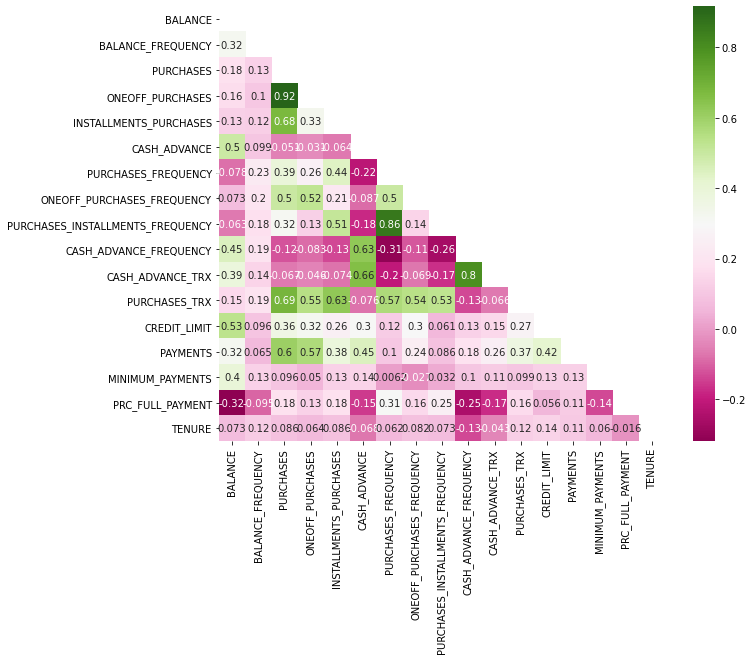

In [147]:
corr = df1.corr()
f, ax = plt.subplots(figsize=(10, 8))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask=mask, cmap='PiYG')

### Checking the distribution of data and outliers in the dataset

In [148]:
numerical_features = [col for col in df1.columns]

<AxesSubplot:>

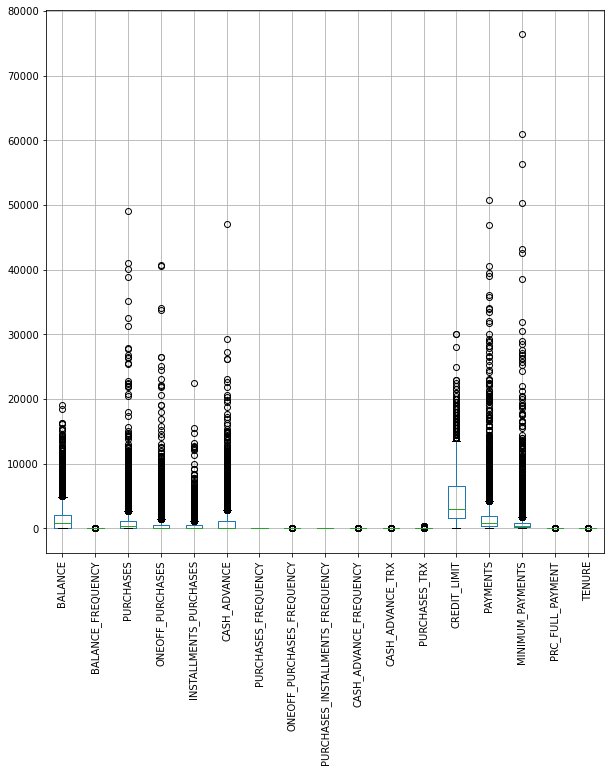

In [149]:
df1[numerical_features].boxplot(figsize=(10, 10), rot = 90)

### Checking the skewness of data before and after normalization and standardization

array([[<AxesSubplot:title={'center':'BALANCE'}>,
        <AxesSubplot:title={'center':'BALANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES'}>],
       [<AxesSubplot:title={'center':'INSTALLMENTS_PURCHASES'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE'}>,
        <AxesSubplot:title={'center':'PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<AxesSubplot:title={'center':'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_TRX'}>,
        <AxesSubplot:title={'center':'PURCHASES_TRX'}>],
       [<AxesSubplot:title={'center':'CREDIT_LIMIT'}>,
        <AxesSubplot:title={'center':'PAYMENTS'}>,
        <AxesSubplot:title={'center':'MINIMUM_PAYMENTS'}>,
        <AxesSubplot:title={'center':'PRC_FULL_PAYMENT'}>],
       [<AxesSubplot:title={'center':'TENURE'

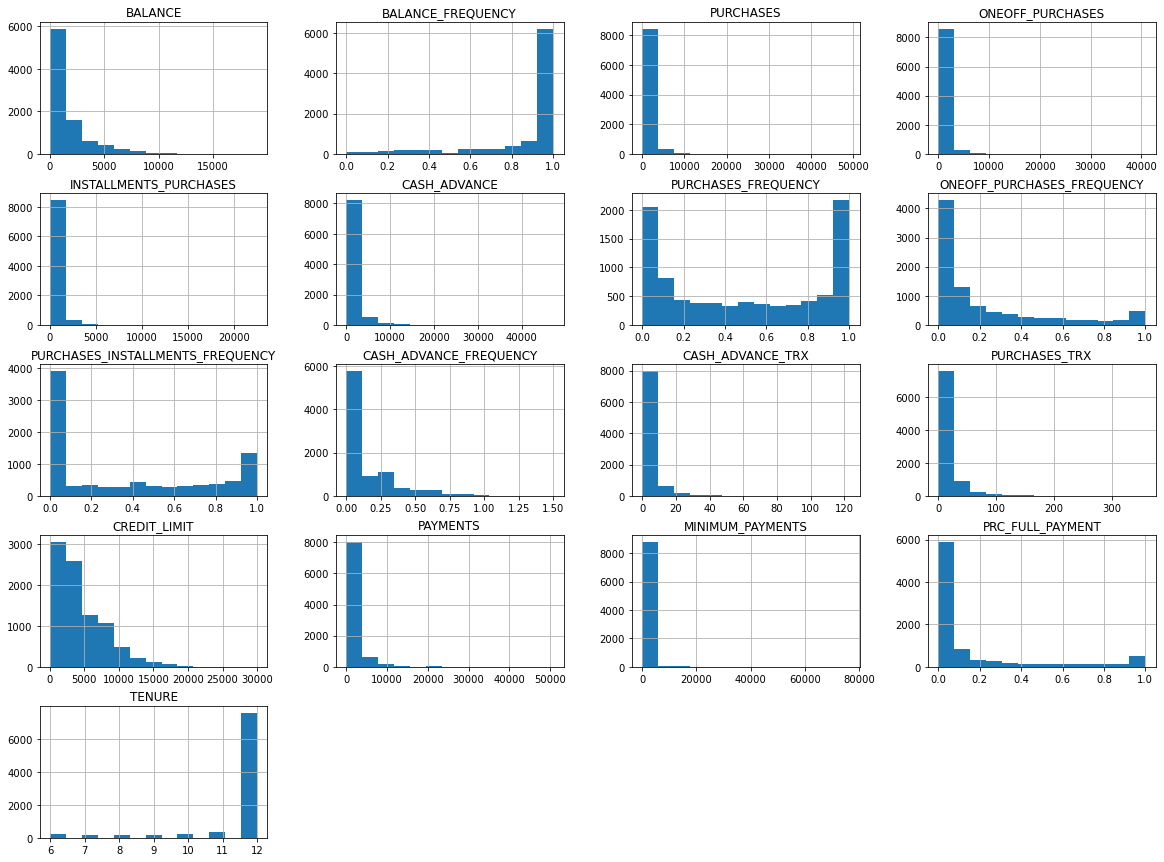

In [150]:
df1.hist(bins=13, figsize=(20, 15), layout=(5, 4))

In [151]:
x=df1.columns.values

### Scaling and normalizing data

In [152]:
standard = StandardScaler().fit_transform(df1)

In [153]:
normalized_df = normalize(standard) 

In [154]:
df = pd.DataFrame(normalized_df) 

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>],
       [<AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>],
       [<AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>,
        <AxesSubplot:title={'center':'15'}>],
       [<AxesSubplot:title={'center':'16'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

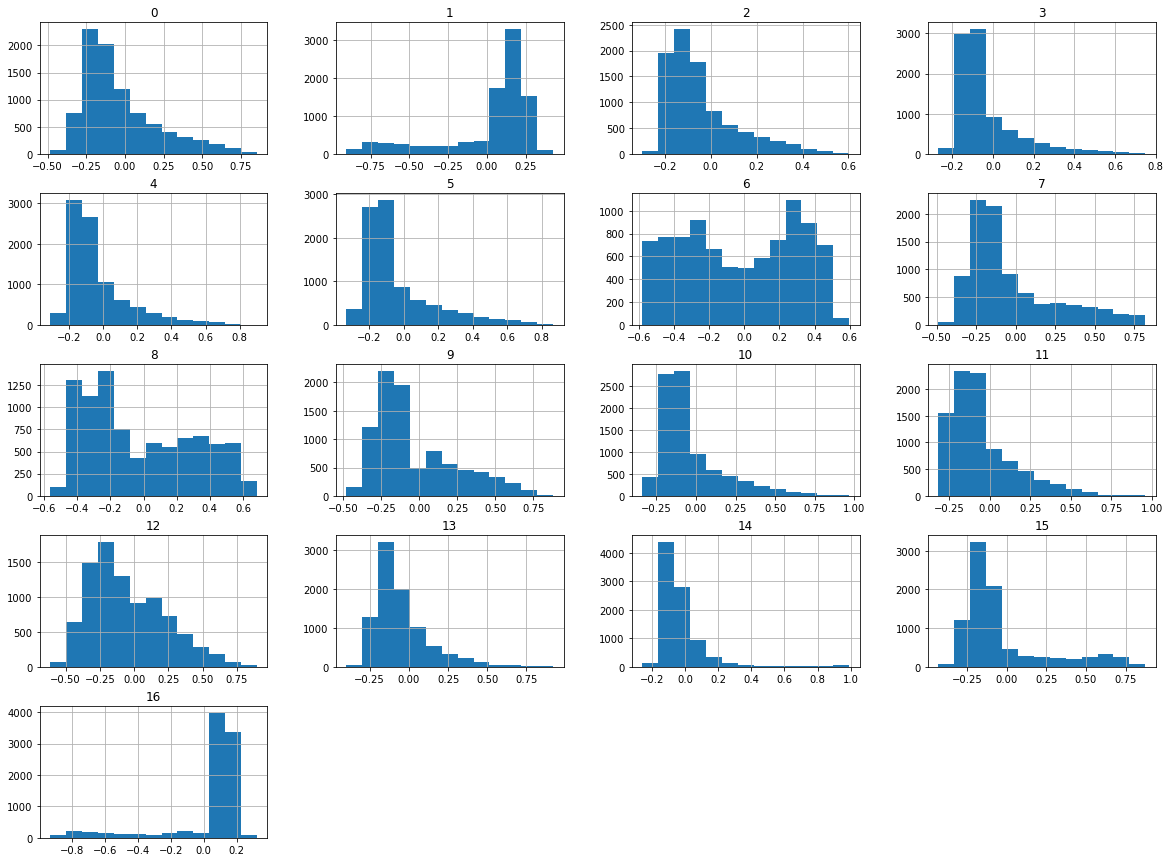

In [155]:
df.hist(bins=13, figsize=(20, 15), layout=(5, 4))

In [156]:
for i in range(len(x)):
    df = df.rename({i:x[i]}, axis=1)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.312087,-0.106348,-0.181158,-0.152181,-0.148831,-0.199016,-0.343851,-0.289350,-0.301566,-0.287938,-0.202975,-0.218009,-0.409485,-0.225533,-0.128930,-0.224071,0.153777
1,0.219912,0.037536,-0.131214,-0.099743,-0.127029,0.728123,-0.341414,-0.189648,-0.256250,0.160391,0.030760,-0.165374,0.192437,0.228765,0.027246,0.065454,0.100790
2,0.126690,0.146793,-0.030506,0.030852,-0.128799,-0.132258,0.359795,0.757490,-0.259819,-0.191352,-0.134889,-0.030890,0.234055,-0.108746,-0.026434,-0.148909,0.102194
3,0.020495,-0.424498,0.096866,0.227991,-0.189750,-0.153884,-0.423318,-0.166684,-0.382774,-0.108076,-0.137555,-0.230235,0.344816,-0.249905,-0.095300,-0.219376,0.150555
4,-0.151656,0.218996,-0.195316,-0.146803,-0.192151,-0.197312,-0.428675,-0.168794,-0.387618,-0.285473,-0.201237,-0.233149,-0.382744,-0.154020,-0.108748,-0.222153,0.152461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.146911,0.103140,-0.066352,-0.071058,-0.026407,-0.092927,0.252799,-0.135107,0.234880,-0.134448,-0.094776,-0.069759,-0.191202,-0.096796,-0.067936,0.235700,-0.820757
8946,-0.151357,0.105621,-0.067100,-0.072767,-0.025040,-0.095163,0.258881,-0.138357,0.240530,-0.137682,-0.097055,-0.071437,-0.195802,-0.102626,-0.046545,-0.107143,-0.840501
8947,-0.156994,-0.039329,-0.085233,-0.075684,-0.062529,-0.098977,0.181205,-0.143904,0.161250,-0.143201,-0.100946,-0.082831,-0.203651,-0.120993,-0.069311,0.069804,-0.874194
8948,-0.154339,-0.038416,-0.097253,-0.073928,-0.094151,-0.093069,-0.253048,-0.140563,-0.189926,0.032627,-0.037902,-0.122572,-0.227386,-0.120239,-0.070069,0.068183,-0.853900


### Using PCA (principal component analysis) as it is believed that it improves the clustering results by doing dimensionality reduction to guarantee more accurate results

In [157]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(df)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

### Slicing dataset to only "CREDIT_LIMIT" and "BALANCE" columns to apply kmeans on them

In [158]:
X = df.iloc[:,[12,0]]
X.head()

,CREDIT_LIMIT,BALANCE
0,-0.409485,-0.312087
1,0.192437,0.219912
2,0.234055,0.126690
3,0.344816,0.020495
4,-0.382744,-0.151656


### Calculating K by the elbow method for the best results

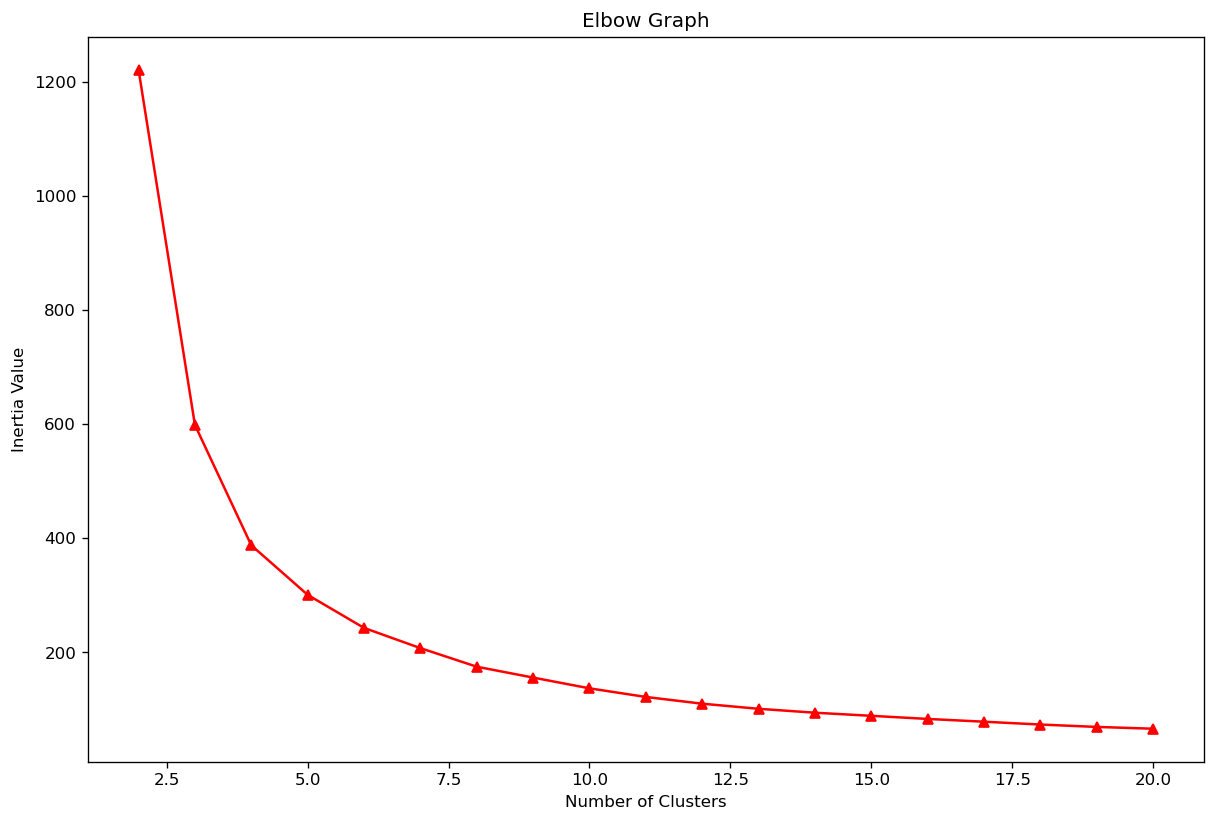

In [159]:
inertia_values = []

for k in range(1, 20):
    model = KMeans(n_clusters = k)
    model.fit(X)
    inertia_values.append(model.inertia_)

plt.figure(figsize = (12, 8), dpi = 120)
plt.plot(range(2, 21), inertia_values, color = 'r', marker = '^')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Value')
plt.title('Elbow Graph')
plt.show()

### Displaying the best K value and plotting it

In [160]:
kl = KneeLocator(range(1, 20), inertia_values, curve = 'convex', direction = 'decreasing')
kl.elbow

4

In [161]:
kmeans = KMeans(kl.elbow, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)
X = X.values

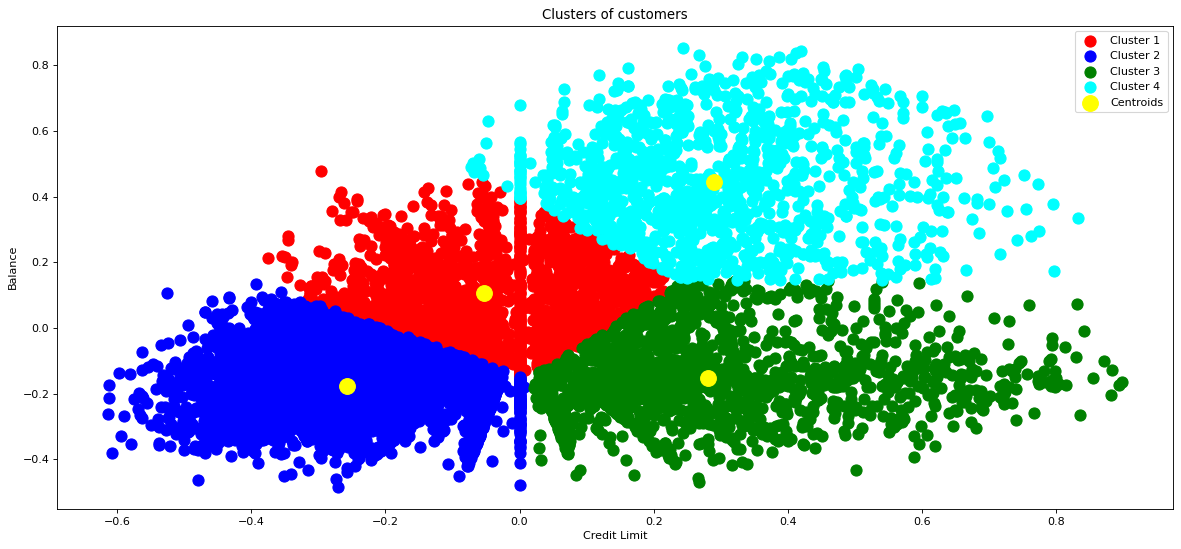

In [162]:
plt.figure(figsize=(18, 8), dpi=80)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Credit Limit')
plt.ylabel('Balance')
plt.legend()
plt.show()

### Trying out different k value rather than the optimal to check the difference

In [163]:
kmeans=KMeans(n_clusters=2, random_state=0) 
y_kmeans=kmeans.fit_predict(X)

In [164]:
kmeans.predict(X)

array([1, 0, 0, ..., 1, 1, 1])

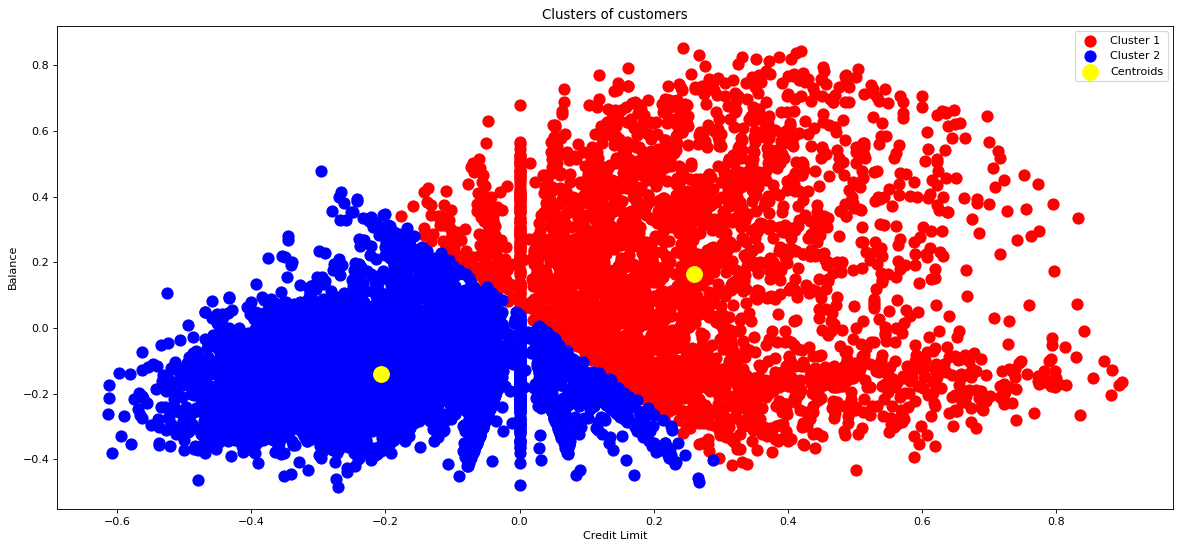

In [165]:
plt.figure(figsize=(18, 8), dpi=80)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Credit Limit')
plt.ylabel('Balance')
plt.legend()
plt.show()

### It's obvious there are a lot of biased clusters and data points that were supposed to be in a cluster alone

### Slicing dataset to only "CASH_ADVANCE" and "PAYMENTS" columns to apply kmeans on them

In [166]:
Y = df.iloc[:,[5,13]]
Y.head()

,CASH_ADVANCE,PAYMENTS
0,-0.199016,-0.225533
1,0.728123,0.228765
2,-0.132258,-0.108746
3,-0.153884,-0.249905
4,-0.197312,-0.154020


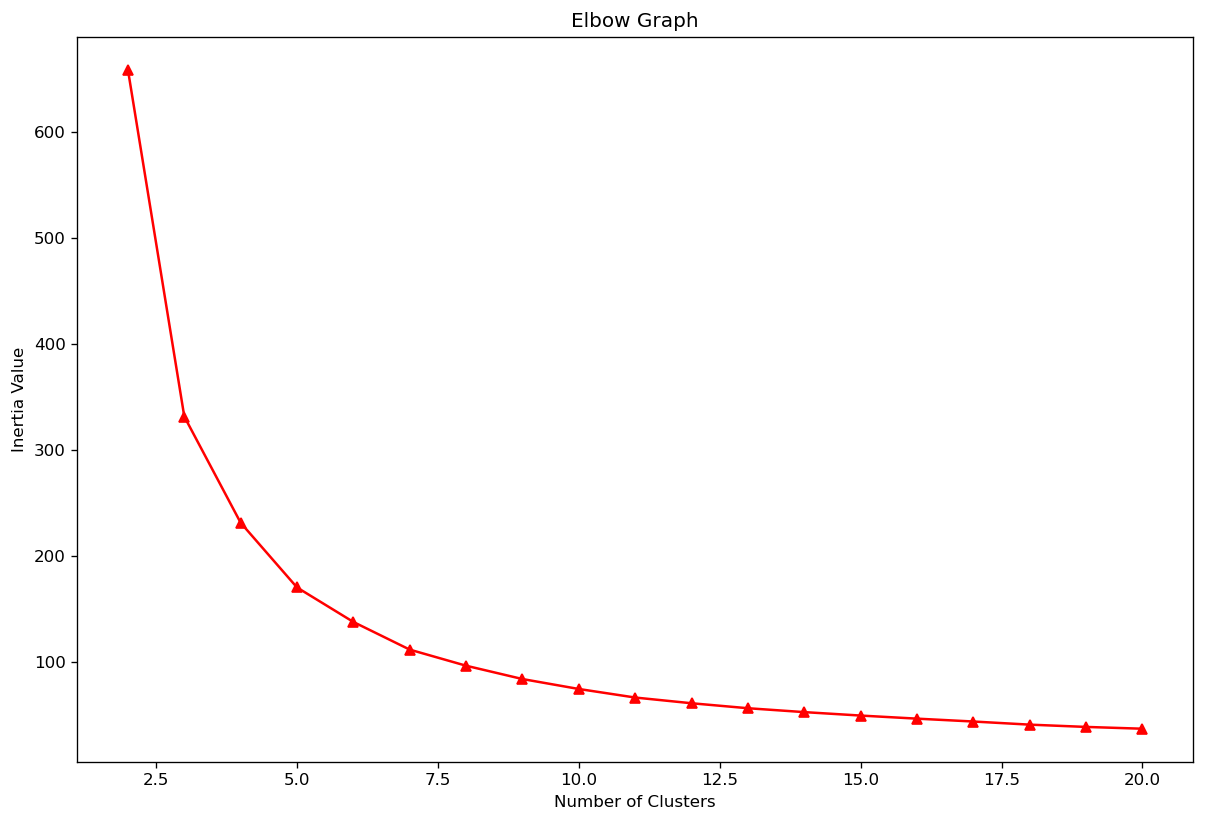

In [167]:
inertia_values = []

for k in range(1, 20):
    model1 = KMeans(n_clusters = k)
    model1.fit(Y)
    inertia_values.append(model1.inertia_)

plt.figure(figsize = (12, 8), dpi = 120)
plt.plot(range(2, 21), inertia_values, color = 'r', marker = '^')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Value')
plt.title('Elbow Graph')
plt.show()

In [168]:
kl = KneeLocator(range(1, 20), inertia_values, curve = 'convex', direction = 'decreasing')
kl.elbow

4

In [169]:
kmeans = KMeans(kl.elbow, init = 'k-means++', random_state = 40)
y_kmeans = kmeans.fit_predict(Y)
Y = Y.values

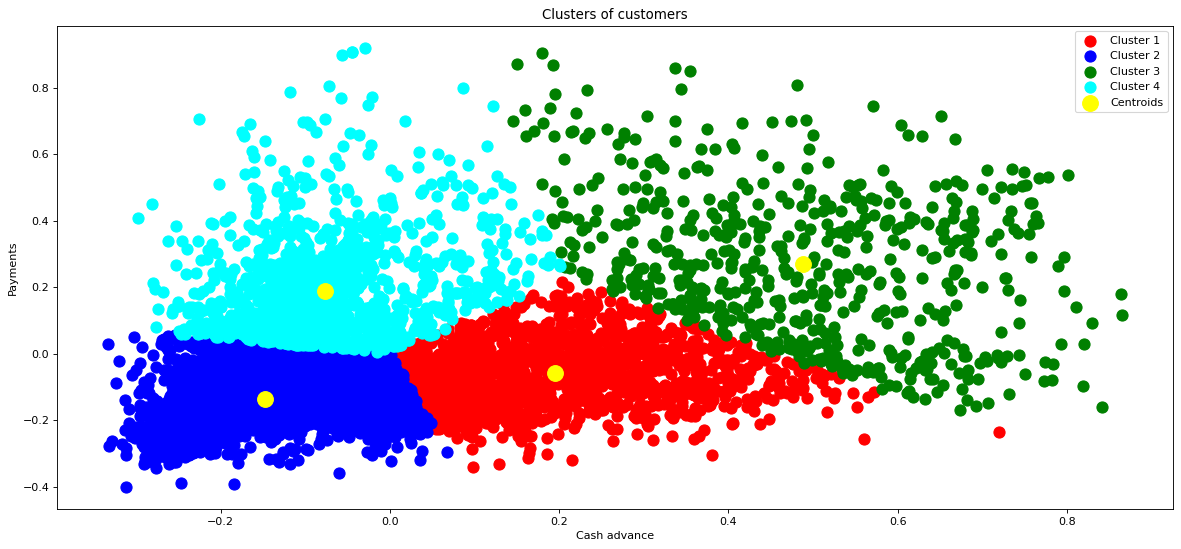

In [170]:
plt.figure(figsize=(18, 8), dpi=80)
plt.scatter(Y[y_kmeans == 0, 0], Y[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(Y[y_kmeans == 1, 0], Y[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(Y[y_kmeans == 2, 0], Y[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(Y[y_kmeans == 3, 0], Y[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Cash advance')
plt.ylabel('Payments')
plt.legend()
plt.show()

### Checking the same X and Y data but without the outliers to know if outlier removal would enhance the clusters' formation

In [171]:
dframe = df.copy()
list(dframe)

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

In [172]:
standardScaler = StandardScaler().fit_transform(dframe)

In [173]:
normalized_df = normalize(standardScaler) 

In [174]:
dframe = pd.DataFrame(normalized_df) 

In [175]:
for i in range(len(x)):
    dframe = dframe.rename({i:x[i]}, axis=1)
dframe

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.316917,-0.121219,-0.249383,-0.215776,-0.171623,-0.217869,-0.277645,-0.257022,-0.243532,-0.266495,-0.230085,-0.249834,-0.366527,-0.281756,-0.200032,-0.193366,0.138691
1,0.222856,0.012070,-0.120359,-0.089818,-0.104531,0.792325,-0.208148,-0.118921,-0.154320,0.152088,0.070207,-0.131905,0.185464,0.333831,0.082992,0.077368,0.058948
2,0.184558,0.118096,0.021895,0.120292,-0.138652,-0.124491,0.326987,0.775256,-0.203817,-0.162871,-0.133659,0.017301,0.282889,-0.094085,0.003288,-0.114582,0.078274
3,0.059112,-0.382428,0.226944,0.438306,-0.210798,-0.140699,-0.312166,-0.121127,-0.282712,-0.070990,-0.125807,-0.240769,0.360687,-0.288752,-0.120069,-0.169849,0.121599
4,-0.136771,0.195264,-0.284021,-0.212660,-0.245570,-0.222682,-0.362856,-0.141111,-0.328607,-0.272666,-0.235226,-0.280465,-0.350578,-0.173402,-0.165286,-0.197748,0.141728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.114258,0.070693,-0.038132,-0.059320,0.013593,-0.065647,0.215938,-0.092659,0.199069,-0.095719,-0.072514,-0.034162,-0.130147,-0.069034,-0.071119,0.248758,-0.879436
8946,-0.119768,0.073378,-0.039648,-0.062637,0.015588,-0.068918,0.222371,-0.096311,0.205027,-0.099511,-0.075925,-0.036598,-0.135382,-0.077986,-0.033162,-0.067042,-0.906648
8947,-0.122962,-0.050875,-0.067823,-0.066080,-0.035501,-0.072070,0.157807,-0.099168,0.139683,-0.102494,-0.079073,-0.050271,-0.139570,-0.102287,-0.072550,0.094853,-0.921485
8948,-0.121972,-0.050820,-0.088308,-0.064103,-0.079433,-0.065833,-0.179066,-0.097583,-0.132197,0.061228,-0.001760,-0.102128,-0.163296,-0.102669,-0.074944,0.094720,-0.913755


In [176]:
Q1 = dframe.quantile(q=.25)
Q3 = dframe.quantile(q=.75)
IQR = dframe.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
dframe = dframe[~((dframe < (Q1-1.5*IQR)) | (dframe > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
dframe.shape

(2669, 17)

In [177]:
X2 = dframe.iloc[:,[12,0]]
X2.head()

,CREDIT_LIMIT,BALANCE
0,-0.366527,-0.316917
4,-0.350578,-0.136771
7,-0.197921,0.104341
8,0.441266,-0.130345
14,-0.134562,0.338859


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


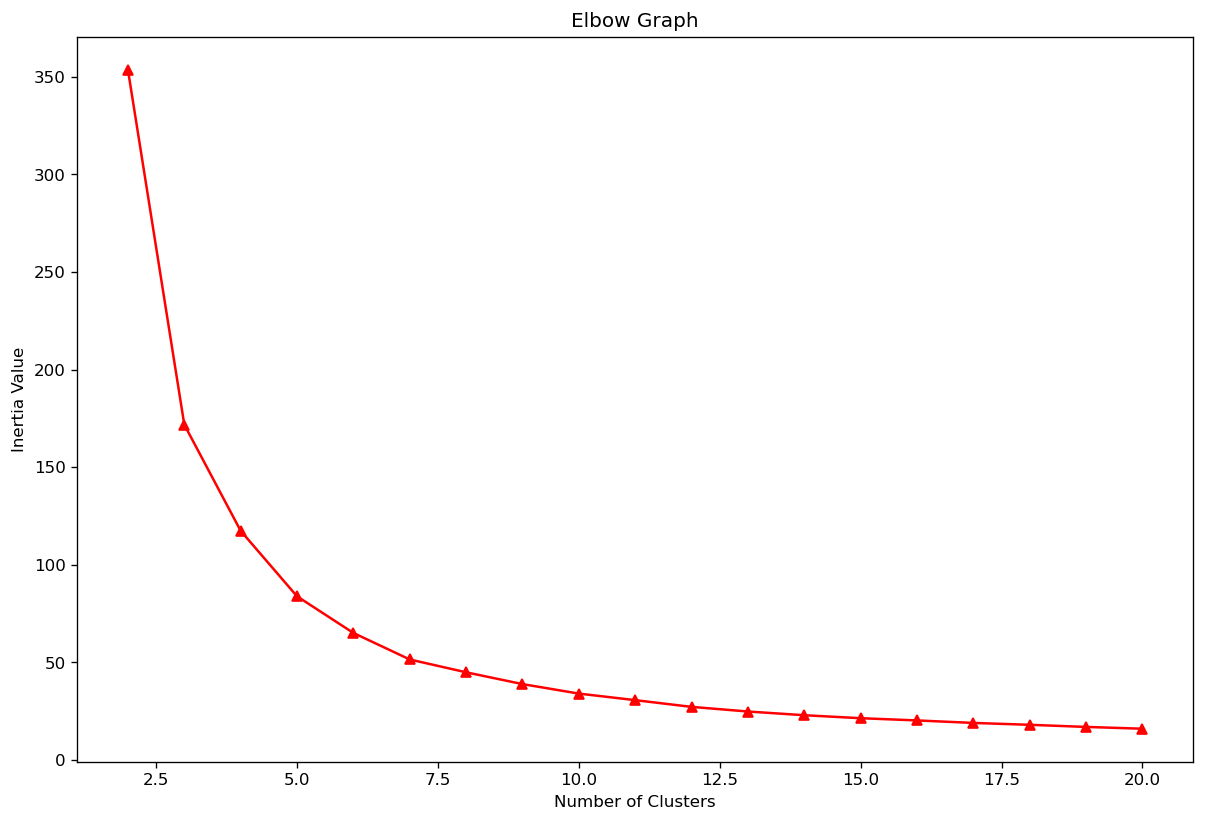

In [178]:
inertia_values = []

for k in range(1, 20):
    model2 = KMeans(n_clusters = k)
    model2.fit(X2)
    inertia_values.append(model2.inertia_)

plt.figure(figsize = (12, 8), dpi = 120)
plt.plot(range(2, 21), inertia_values, color = 'r', marker = '^')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Value')
plt.title('Elbow Graph')
plt.show()

In [179]:
kl = KneeLocator(range(1, 20), inertia_values, curve = 'convex', direction = 'decreasing')
kl.elbow

5

In [180]:
kmeans = KMeans(kl.elbow, init = 'k-means++', random_state = 20)
y_kmeans = kmeans.fit_predict(X2)
X2 = X2.values

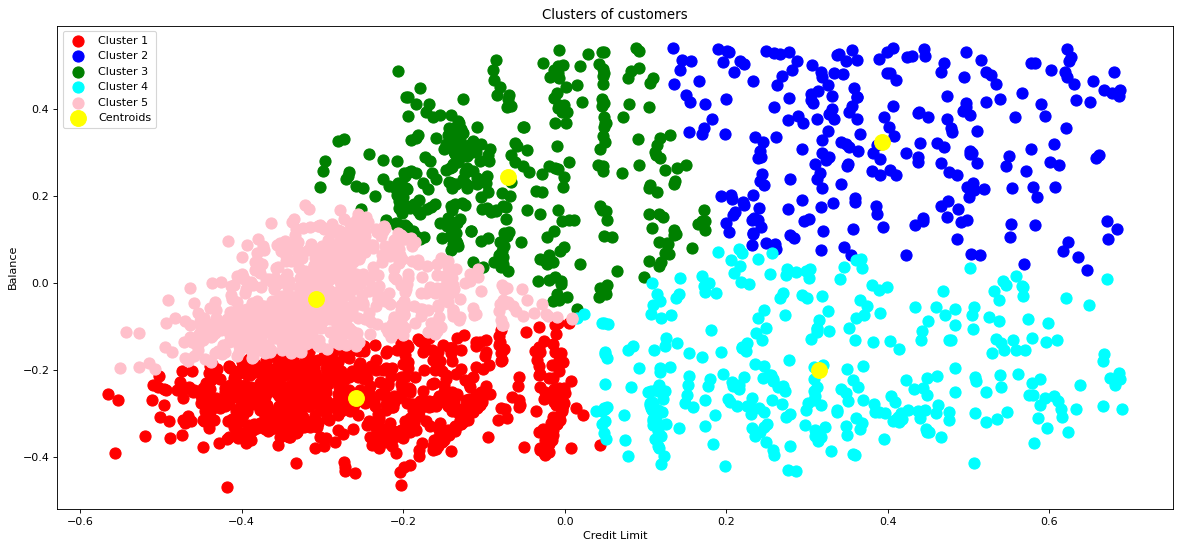

In [181]:
plt.figure(figsize=(18, 8), dpi=80)
plt.scatter(X2[y_kmeans == 0, 0], X2[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X2[y_kmeans == 1, 0], X2[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X2[y_kmeans == 2, 0], X2[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X2[y_kmeans == 3, 0], X2[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X2[y_kmeans == 4, 0], X2[y_kmeans == 4, 1], s = 100, c = 'pink', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Credit Limit')
plt.ylabel('Balance')
plt.legend()
plt.show()

In [182]:
Y2 = dframe.iloc[:,[5,13]]
Y2.head()

,CASH_ADVANCE,PAYMENTS
0,-0.217869,-0.281756
4,-0.222682,-0.173402
7,-0.203428,-0.154319
8,-0.306583,-0.248794
14,-0.127700,-0.147562


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


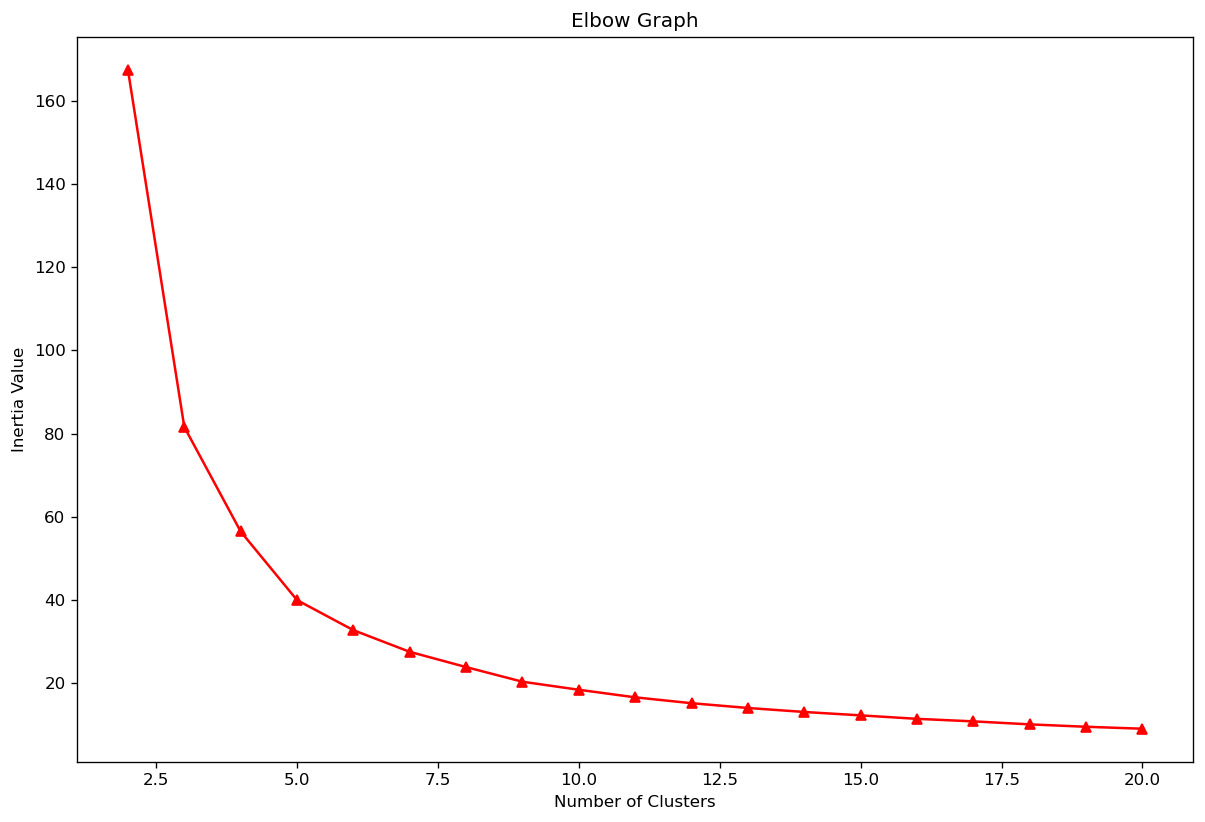

In [183]:
inertia_values = []

for k in range(1, 20):
    model3 = KMeans(n_clusters = k)
    model3.fit(Y2)
    inertia_values.append(model3.inertia_)

plt.figure(figsize = (12, 8), dpi = 120)
plt.plot(range(2, 21), inertia_values, color = 'r', marker = '^')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Value')
plt.title('Elbow Graph')
plt.show()

In [184]:
kl = KneeLocator(range(1, 20), inertia_values, curve = 'convex', direction = 'decreasing')
kl.elbow

4

In [185]:
kmeans = KMeans(kl.elbow, init = 'k-means++', random_state = 40)
y_kmeans = kmeans.fit_predict(Y2)
Y2 = Y2.values

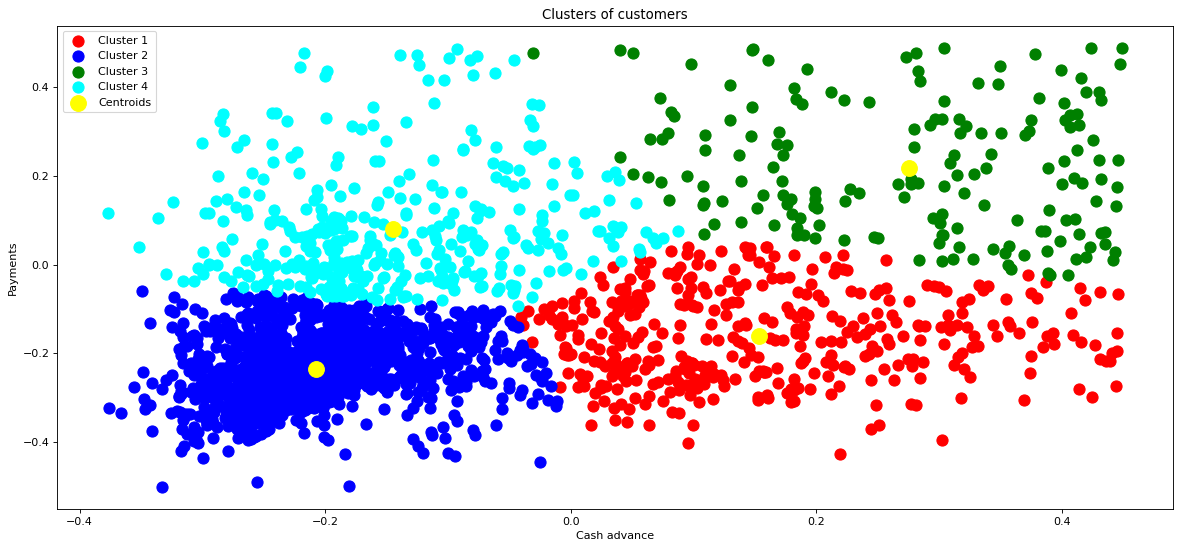

In [186]:
plt.figure(figsize=(18, 8), dpi=80)
plt.scatter(Y2[y_kmeans == 0, 0], Y2[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(Y2[y_kmeans == 1, 0], Y2[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(Y2[y_kmeans == 2, 0], Y2[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(Y2[y_kmeans == 3, 0], Y2[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Cash advance')
plt.ylabel('Payments')
plt.legend()
plt.show()

### It's obvious now that outliers removal in this dataset wasn't the best idea, and handling the data as much as possible through standardization and normalization was essential. Yet, we are going to use PCA declared earlier to reduce dimensionality of the dataset and give the best, accurate clusters

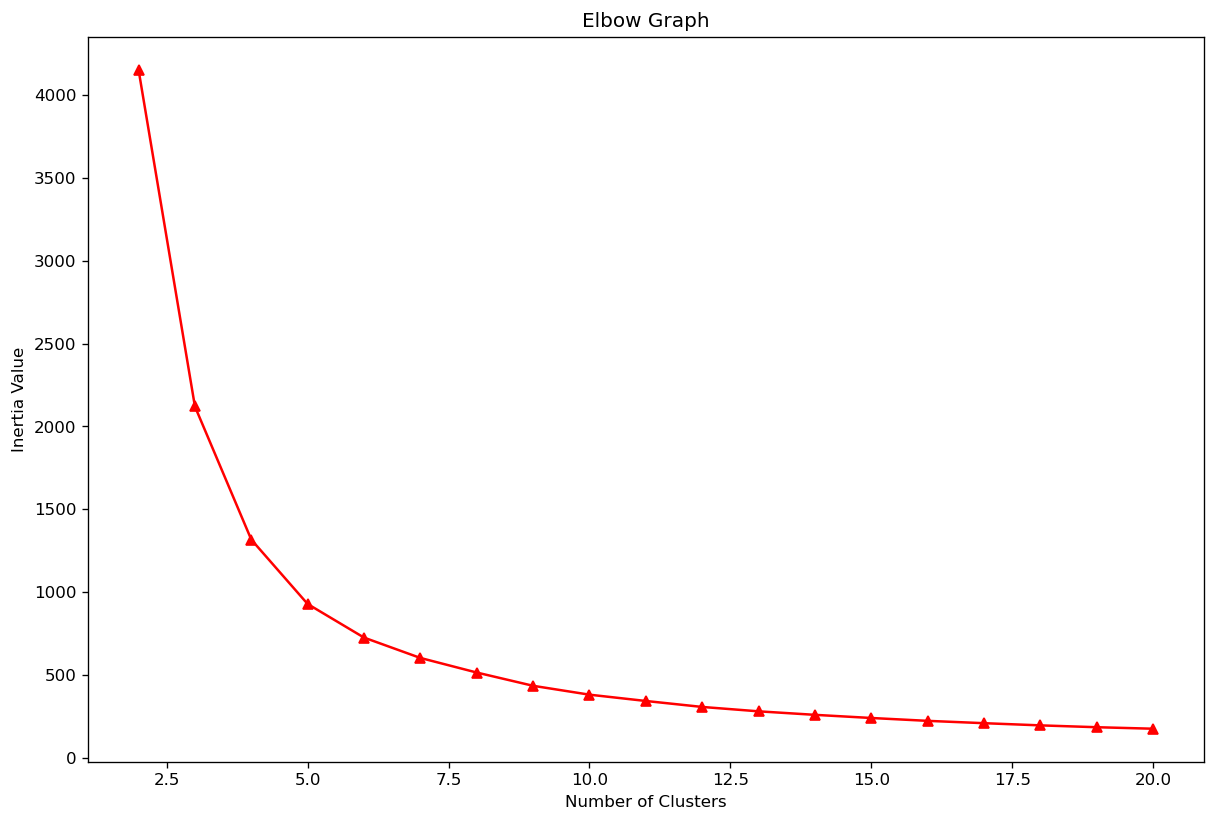

In [122]:
inertia_values = []

for k in range(1, 20):
    model = KMeans(n_clusters = k)
    model.fit(X_principal)
    inertia_values.append(model.inertia_)

plt.figure(figsize = (12, 8), dpi = 120)
plt.plot(range(2, 21), inertia_values, color = 'r', marker = '^')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Value')
plt.title('Elbow Graph')
plt.show()

In [123]:
kl = KneeLocator(range(1, 20), inertia_values, curve = 'convex', direction = 'decreasing')
kl.elbow

4

In [124]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_principal)

KMeans(n_clusters=4)

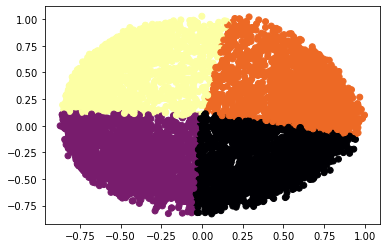

In [125]:
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = KMeans(n_clusters = 4).fit_predict(X_principal),cmap ='inferno_r') 
plt.show() 

### Beginning with the agglomerative algorithm, I visualized the dendrograms to see how the data is clustered, and I calculated the optimal number of clusters by checking the distance of the vertical lines in the dendrogram, the more the distance of the vertical lines the more the distance between those clusters. Generally, we try to set the threshold in such a way that it cuts the tallest vertical line 

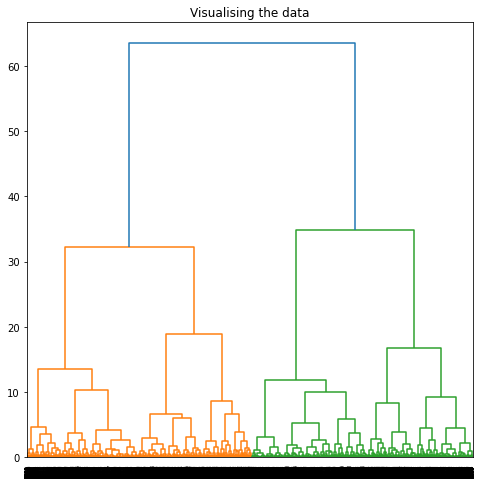

In [129]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

### Here the biggest distance cuts 4 vertical lines, which means the optimal number of clusters is 4.

No handles with labels found to put in legend.


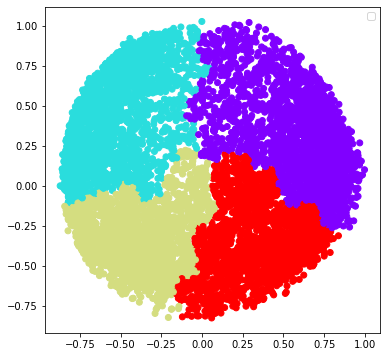

In [134]:
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = AgglomerativeClustering(n_clusters = 4).fit_predict(X_principal), cmap ='rainbow') 
plt.legend()
plt.show() 

### The differences between k-means and agglomerative clustering can be viewed from the PCA scatterplots of both algorithms and they differ a lot. the data in agglomerative clustering is more distributed and clusters cannot be defined because they interconnect among each other. K-means on the other hand, you can see the clusters better defined and less separated, which gives more accurate results.